# Salary analysis

<h3 style="margin-top: 5px; margin-bottom: 6px;">Question to Answer</h3>
<p style="font-size:15px; margin-top: 0; margin-bottom: 16px;">

<b>
   <ol>
      <li>How well do jobs and skills pay for different data roles? </li>
      <li>How are salaries distributed across job titles and locations?</li>
   </ol>
</b>
</p>

### Importing Libraries and Dataset
<hr>


In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# importing cleaned dataset
df = pd.read_csv('data_cleaned_jobs.csv')

# data parsing
df['job_posted_date'] = pd.to_datetime(df.job_posted_date).dt.date
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_year_avg,company_name,job_skills,original_salary_year_avg
0,Data Analyst,Sr Data Analyst,"Tampa, FL",via Trabajo.org,Full-time,False,2023-01-01,False,False,United States,100000.0,"TWO95 International, Inc","[sql, sql server, excel, ssrs, power bi, power...",NaN
1,Data Analyst,Product Managers Data analyst,"Boston, MA",via LinkedIn,Full-time,False,2023-01-01,False,False,United States,90000.0,Diverse Lynx,[sql],NaN
2,Data Scientist,AI/ML Radar Research Data Scientist Jobs,"San Diego, CA",via Clearance Jobs,Full-time,False,2023-01-01,False,False,United States,135000.0,Leidos,"[python, matlab]",NaN
3,Data Analyst,Data Management Analyst,"Dallas, TX",via Indeed,Full-time,False,2023-01-01,False,False,United States,92500.0,KORE1 Technologies,"[sql, excel, tableau, terminal]",NaN
4,Data Scientist,Data Science Consultant,"San Francisco, CA",via Mendeley,Full-time,False,2023-01-01,False,False,United States,157500.0,Resume Library,NaN,NaN


### Determine the highest paid and most demanded Skills
<hr>


<h4 style="margin-bottom: 8px;">Methodology</h4>

<ol style="margin-top: 4px; line-height: 1.5;">
  <li>Select the target job role for analysis.</li>
  <li>Compute the total skill frequency and mean salary for the selected role.</li>
  <li>Identify the top 10 highest-paying and top 10 most in-demand skills.</li>
  <li>Visualize both salary and demand trends for the key skills.</li>
</ol>

Note: Since most salary values were missing, median-based imputation compressed salary variation a lot. Therefore, mean values are used for comparative analysis of skill-level pay trends.

In [211]:
# Select job title for the analysis
job_role = 'Data Analyst'

# Explode the skills list column
df_filtered = df[df.job_title_short == job_role]
df_exploded = df_filtered[df_filtered.job_skills.notna()].explode('job_skills', ignore_index=True)

# Highest Paid skills
most_paid_skills = (df_exploded.groupby('job_skills')['salary_year_avg']
                    .agg(['mean', 'count'])
                    .sort_values(by='mean', ascending=False)
                    .head(10)
                    .reset_index(names='job_skills')
                    .set_index('job_skills', drop=True)
)
print('Most paid skills:')
print(most_paid_skills)
print('')


# Most demanded skills
most_demand_skills = (df_exploded.groupby('job_skills')['salary_year_avg']
                      .agg(['count', 'mean'])
                      .sort_values(by='count', ascending=False)
                      .head(10)
                      .reset_index(names='job_skills')
                      .set_index('job_skills', drop=True)
)

# Determine likelihood of job skill required in job posting
total_job_post = df_filtered['job_title_short'].count()
most_demand_skills['%_share'] = 100*(most_demand_skills['count']/total_job_post)

print('Most demanded skills:')
print(most_demand_skills)

Most paid skills:
                       mean  count
job_skills                        
hugging face  132500.000000      2
dplyr         111250.000000     10
mxnet         107851.285714      7
twilio        106179.777778      9
solidity      105253.090909     11
vue.js        103000.000000      1
airflow       100280.983077    325
chainer       100000.000000      1
theano        100000.000000      1
pytorch        98819.354651     86

Most demanded skills:
            count          mean    %_share
job_skills                                
sql         29029  92543.978317  50.767751
excel       23526  90959.494454  41.143757
tableau     16480  92996.190152  28.821266
python      15831  93601.259891  27.686254
sas         11552  91187.078360  20.202868
r           10380  92785.417267  18.153200
power bi    10071  91377.376037  17.612802
word         6579  90436.080992  11.505771
powerpoint   6100  91065.312778  10.668066
oracle       4238  92059.408160   7.411682


### Plotting the most paid and most demanded skills
<hr>


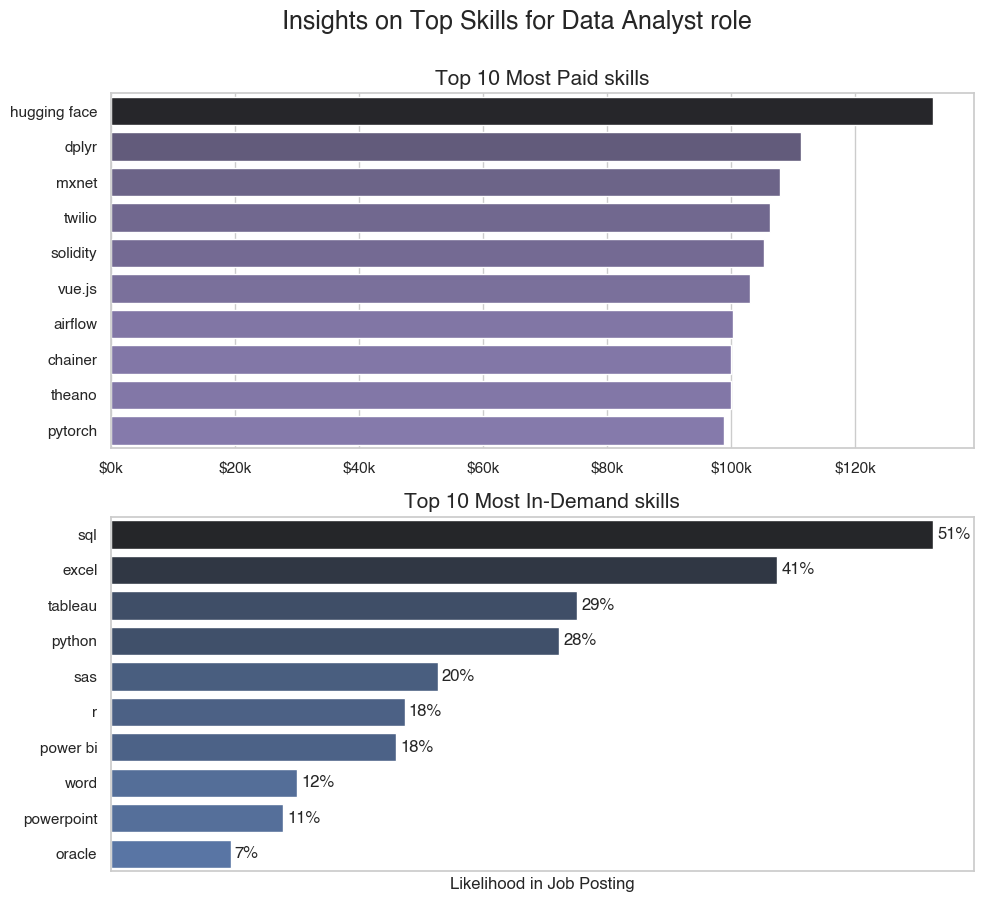

In [234]:
# setting plot theme
sns.set_theme(style="whitegrid", context='notebook', palette='deep', font='Helvetica')

# plotting top 10 paid skills
fig, ax = plt.subplots(2,1, figsize=(10,9))
sns.barplot(data=most_paid_skills, 
            x='mean', 
            y='job_skills', 
            ax=ax[0],
            hue='mean',
            palette='dark:m_r'
)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_title('Top 10 Most Paid skills', fontsize=15, fontweight='bold')
ax[0].legend().remove()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

# plotting top 10 demanded skills
sns.barplot(data=most_demand_skills, 
            x='%_share', 
            y='job_skills', 
            ax=ax[1],
            hue='%_share',
            palette='dark:b_r'
)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{round(x)}%'))
ax[1].set_title('Top 10 Most In-Demand skills', fontsize=15, fontweight='bold')
ax[1].legend().remove()
ax[1].set_xlabel('Likelihood in Job Posting')
ax[1].set_xticks([])

# labelling the bars
for ind, v in enumerate(most_demand_skills['%_share']):
      ax[1].text(v+0.25, ind, f'{round(v)}%', va='center')

fig.suptitle(f'Insights on Top Skills for {job_role} role', fontsize=18, fontweight='bold', y=1, x=0.525)
fig.tight_layout()

### Salary Distribution by Job Title 
<hr>


<h4 style="margin-bottom: 8px;">Methodology</h4>
<ol style="margin-top: 4px; line-height: 1.5;">
  <li>Use the original salary data (before imputation) to preserve true salary variation.</li>
  <li>Calculate the <b>median salary</b> for each data-related job role.</li>
  <li>Visualize salary distribution across roles using <b>box plots</b> to highlight pay range and outliers.</li>
</ol>


<b>Note:</b> Since most salary values were missing, median-based imputation compressed salary variation significantly. Therefore, the original salary data is used for distribution analysis.

In [166]:
# extracting job titles sorted descending based on median salary
median_salaries = df.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False )
job_titles = median_salaries.index
job_titles


Index(['Senior Data Scientist', 'Machine Learning Engineer',
       'Senior Data Engineer', 'Data Scientist', 'Data Engineer',
       'Senior Data Analyst', 'Business Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

### Plot Salary Distributions
<hr>

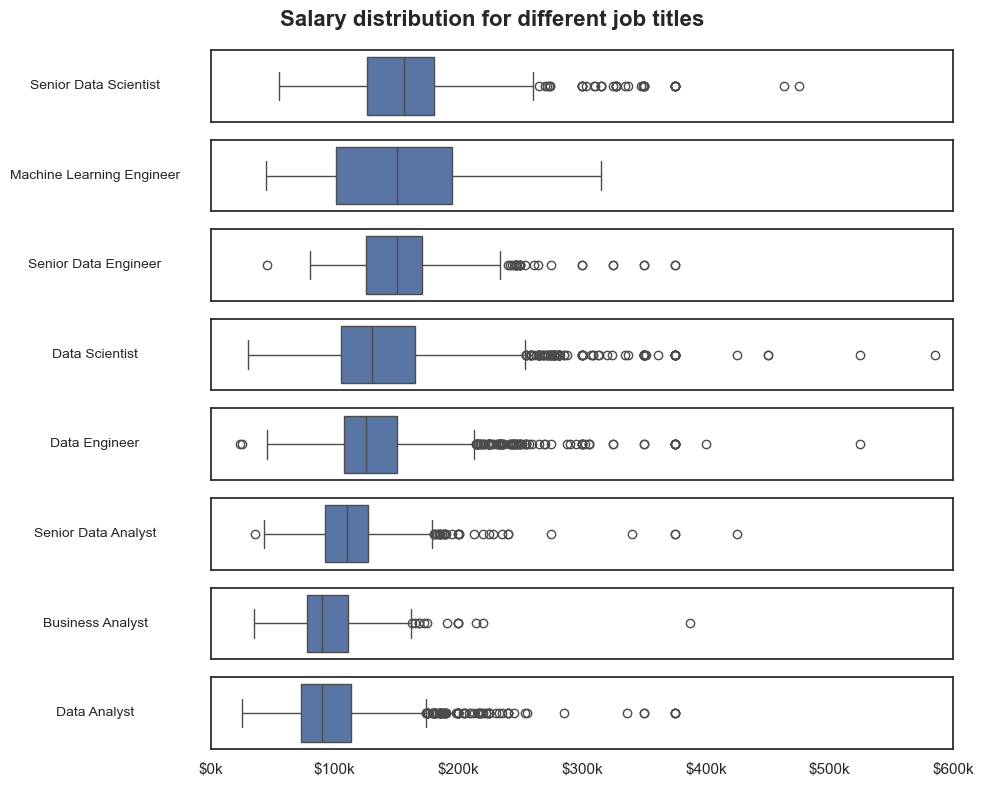

In [178]:
# plotting salary distriubtion
df_known = df[df['original_salary_year_avg'].notna()]
fig, ax = plt.subplots(len(job_titles), 1, figsize=(10, 8))

# setting plot style
sns.set_style('white')

for i, job_title in enumerate(job_titles):
    temp = df_known[df_known.job_title_short == job_title]
    sns.boxplot(x='original_salary_year_avg', data=temp, ax=ax[i], orient='h')

    ax[i].set_xlabel('')
    ax[i].set_ylabel(job_title, rotation=0, labelpad=80, fontsize=10, va='center')
    
    ax[i].tick_params(axis='y', length=0)
    ax[i].set_xlim(0, 600000)
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

    if i < len(job_titles) - 1:
        ax[i].tick_params(labelbottom=False)

fig.suptitle('Salary distribution for different job titles', fontweight='bold', fontsize=16)
fig.subplots_adjust(left=0.25)
fig.tight_layout()
plt.show()

### Salary distribution by locations

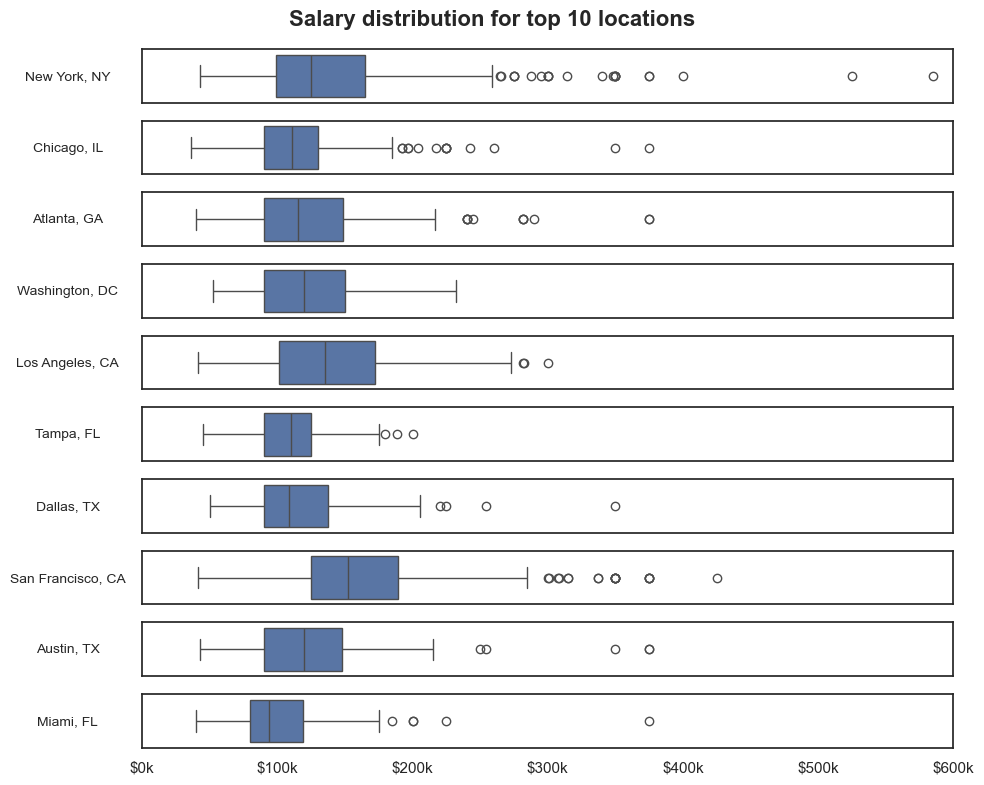

In [209]:
# Top 10 location with most job postings
job_loc = list(df_filtered[df_filtered.original_salary_year_avg.notna()]
               .groupby('job_location')['job_location']
               .count()
               .sort_values(ascending=False)[1:11]
               .index
)

# plotting salary distriubtion
df_known = df_known[df_known['job_location'].notna()]
fig, ax = plt.subplots(len(job_loc), 1, figsize=(10, 8))

# setting plot style
sns.set_style('white')

for i, job_loc in enumerate(job_loc):
    temp = df_known[df_known.job_location == job_loc]
    sns.boxplot(x='original_salary_year_avg', data=temp, ax=ax[i], orient='h')

    ax[i].set_xlabel('')
    ax[i].set_ylabel(job_loc, rotation=0, labelpad=50, fontsize=10, va='center')
    
    ax[i].tick_params(axis='y', length=0)
    
    ax[i].set_xlim(0, 600000)
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

    if i < len(job_loc) - 1:
        ax[i].tick_params(labelbottom=False)

fig.suptitle('Salary distribution for top 10 locations', fontweight='bold', fontsize=16)
fig.subplots_adjust(left=0.25)
fig.tight_layout()
plt.show()